# Cheat Sheet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# No np.linalg.norm
# No np.linalg.lstsq

### K-means clustering  - 2D for 2 means, 5 iterations

In [ ]:
df = pd.DataFrame() # Unclassified DataFrame with an x1 and x2 column

x1 = df['x1'] # Extract columns as vars (not strictly necessary)
x2 = df['x2']

mean_1 = np.array([-1, -1]) # Input starting means, add other means here for larger K
mean_2 = np.array([2, 1])


def distance(x1, x2, target): # Vectorised distance between a list of points (separated into x1 and x2) and a target point
    return np.sqrt((x1-target[0])**2 + (x2-target[1])**2) # L2 norm

for _ in range(5): # Change here for more iterations
    df["class"] = np.where(distance(x1, x2, mean_1) < distance(x1, x2, mean_2), 1, 2) # Vectorised class column creation based on minimum distance to means
    c1_df = df[df["class"] == 1] # DF with class 1 points only
    c2_df = df[df["class"] == 2] # DF with class 2 points only

    mean_1 = np.array([c1_df["x1"].mean(), c1_df["x2"].mean()]) # Update starting means with the average point of each class
    mean_2 = np.array([c2_df["x1"].mean(), c2_df["x2"].mean()])

    x1_mean = np.array([mean_1[0], mean_2[0]]) # Get separate arrays of x1 and x2 points of the means for plotting
    x2_mean = np.array([mean_1[1], mean_2[1]]) 

    plt.scatter(x1, x2, c=df["class"]) # Scatter plot coloured by class
    plt.scatter(x1_mean, x2_mean, color="red") # Plot means
    plt.show()
    print(f"{mean_1=}, {mean_2=}") # Print means



### Bayesian statistics - means and covariance matrices for 2 classes

In [ ]:
df = pd.DataFrame() # Classified DataFrame with an x1 and x2 column, along with a y column for classes

df1 = df[df["y"]==1] # DF with class 1 points only
df2 = df[df["y"]==2]

mean1 = np.array([df1["x1"].mean(), df1["x2"].mean()]) # Calculate means of each class
mean2 = np.array([df2["x1"].mean(), df2["x2"].mean()])

std1x1 = np.std(df1["x1"]) # Calculate standard deviations of x1 and x2 for each class
std1x2 = np.std(df1["x2"]) # NB use np.std not pd.std for unbiased estimator
std2x1 = np.std(df2["x1"])
std2x2 = np.std(df2["x2"])

covar1 = np.array([[std1x1**2, 0], # Covariance matrix in the form [[var1, covar], [covar, var2]]
                  [0, std1x2**2]])
covar2 = np.array([[std2x1**2, 0], 
                  [0, std2x2**2]])

### Bayesian statistics - visualising the probability data belongs to class 2 rather than class 1

In [ ]:
# Given functions

#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation, = Xgrid
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

grid, x1line, x2line = gen_sample_grid(200, 200, 2.5) # Change to represent the range of the data and number of points

px_w1 = prob_density_2d(grid, mean1[0], mean1[1], covar1) # Likelihood of class 1 - probability distribution of an observation given its class - value(s) from a pdf
px_w2 = prob_density_2d(grid, mean2[0], mean2[1], covar2)

pw1 = len(df1["x1"]) / len(df["x1"]) # Prior of class 1 - probability of a class before an observation has occurred
pw2 = len(df2["x1"]) / len(df["x1"]) 

px = px_w1 * pw1 + px_w2 * pw2 # Evidence - scaling term

pw1_x = px_w1 * pw1 / px # Posterior of class 1 - probability of an observation belonging to a class after being observed
pw2_x = px_w2 * pw2 / px

pw2_x = pw2_x.reshape(200, 200) # Reshape to 2D with same dimensions as the original grid
prediction = np.where(pw1_x > pw2_x, 1, 2).reshape(200, 200) # Predicted class based on posterior probabilities (useful but not used in this question)
plt.contourf(x1line, x2line, pw2_x) # Contour plot of the posterior probability of class 2
plt.colorbar()
plt.scatter(x1, x2, c=df["y"]) # Scatter plot coloured by true class
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()
print(px_w1)

### Regression - 3 parameter linear regression

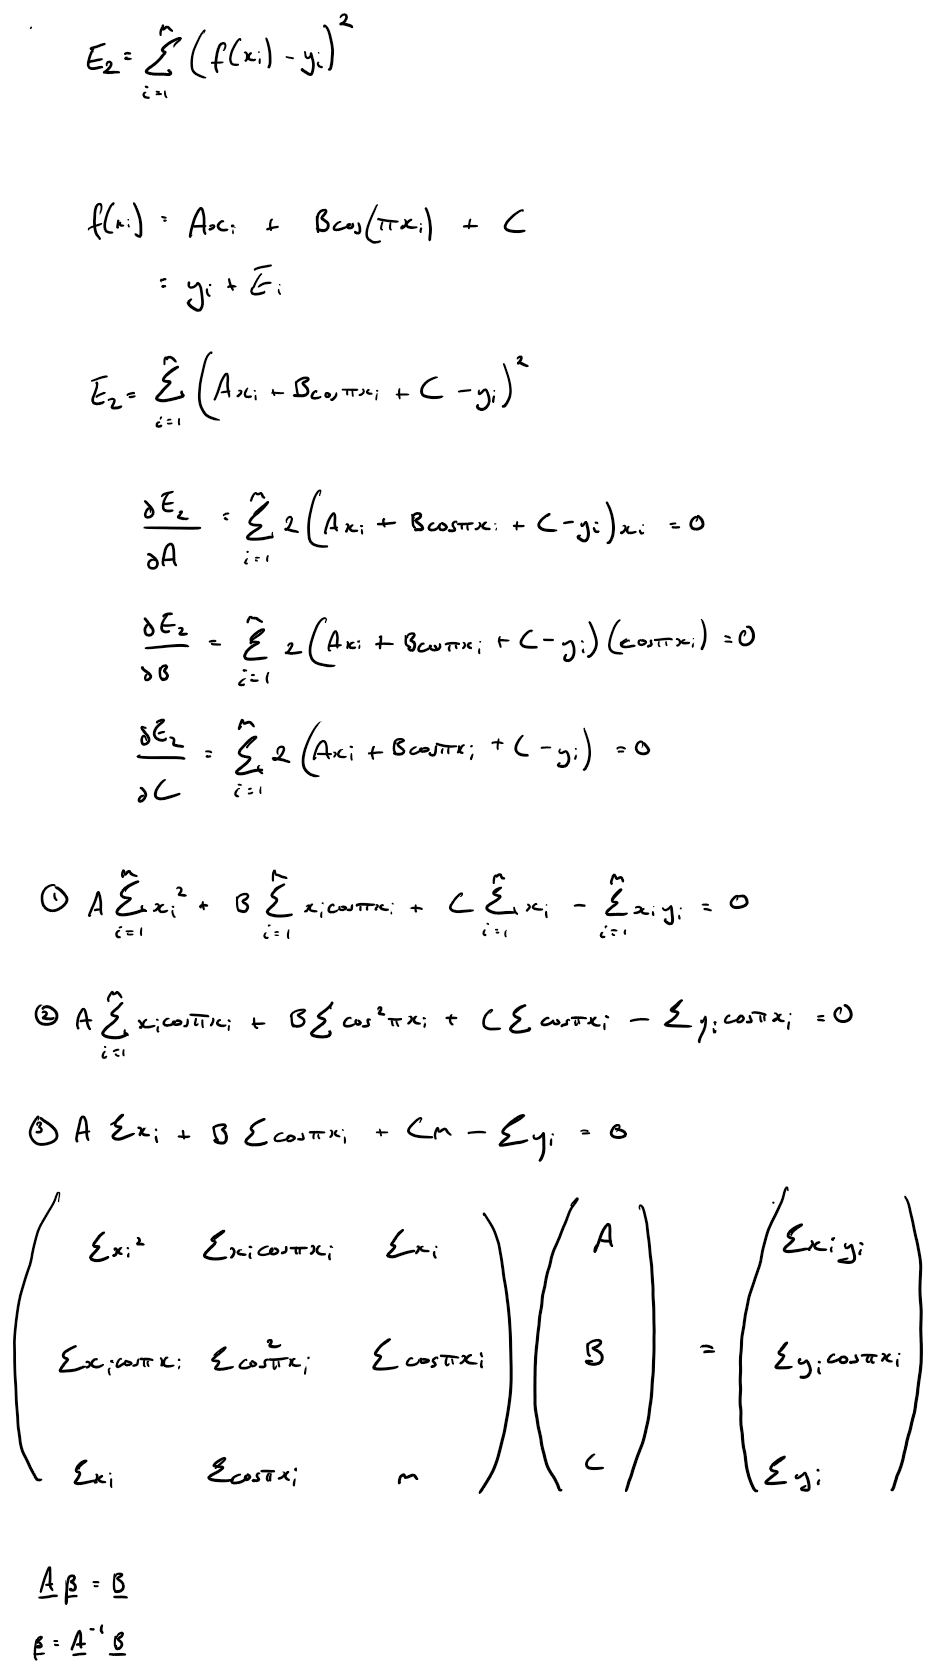

In [ ]:
df = pd.DataFrame() # DataFrame with an x and y column for continuous data

x = df['x']
y = df['y']

plt.scatter(x, y) # Scatter plot of the data

m = len(x)
xrange = np.linspace(-3, 3, m) # Range of x values

def f(x, A, B, C): # Function to fit with unknown parameters
    return A * x + B * np.cos(np.pi * x) + C

sx = np.sum(x) # See working for the following calculations
sx2 = np.sum(x**2)
scos = np.sum(np.cos(np.pi * x))
sxcos = np.sum(x * np.cos(np.pi * x))
scos2 = np.sum(np.cos(np.pi * x)**2)
sxy = np.sum(x * y)
sycos = np.sum(y * np.cos(np.pi * x))
sy = np.sum(y)

A_mat = np.array([[sx2, sxcos, sx], [sxcos, scos2, scos], [sx, scos, m]]) # 3x3 matrix 
B_mat = np.array([[sxy, sycos, sy]]).T # 3x1 matrix

A, B, C = np.linalg.solve(A_mat, B_mat) # Solve for constants and unpack
print(A, B, C)

plt.plot(xrange, f(xrange, A, B, C), color="red") # Plot the fitted function in red

### Regression - 2 parameter exponential

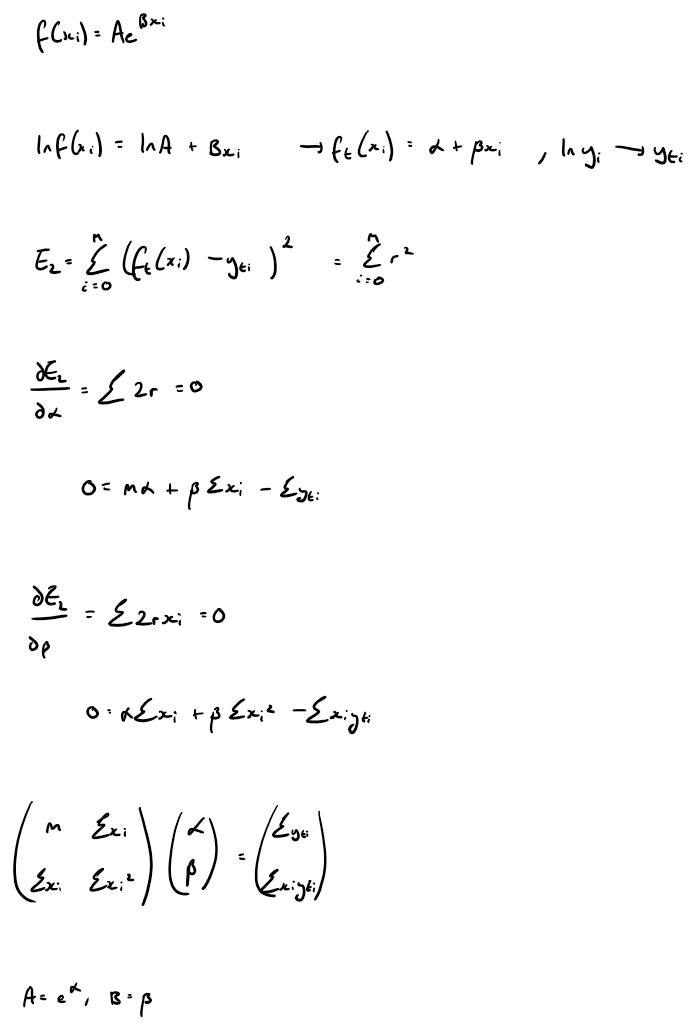

In [ ]:
df = pd.DataFrame() # DataFrame with an x and y column for continuous data

x = np.array(df['x']) 
y = np.array(df['y'])
plt.scatter(x, y) # Scatter plot of the data

# Transform to log space by taking the natural log of both sides of the given function to solve
yt = np.log(y) # Transform y values
m = x.size # Number of data points

def f(x, A, B): # Function to fit with unknown parameters
  return A*np.exp(B*x)

sx = np.sum(x) # See working for the following calculations
sx2 = np.sum(x**2)
sy = np.sum(yt)
sxy = np.sum(x*yt)

A_mat = np.array([[m, sx], [sx, sx2]]) # 2x2 matrix
B_mat = np.array([[sy], [sxy]]) # 2x1 matrix

alpha, beta = np.linalg.solve(A_mat, B_mat) # Solve for constants and unpack
A = np.exp(alpha) # Return to original space
B = beta
print(A, B)

xrange = np.linspace(-3, 3, 100) 
plt.plot(xrange, f(xrange, A, B), c="red") # Plot the fitted function in red

### Regression - 3 parameter gradient descent

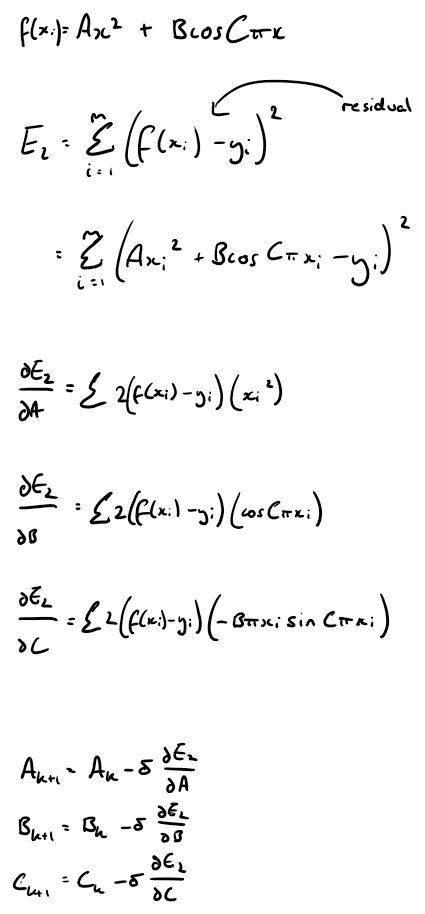

In [ ]:
df = pd.DataFrame() # DataFrame with an x and y column for continuous data

x = np.array(df['x'])
y = np.array(df['y'])

n_points = y.size

plt.scatter(x, y, c="black") # Scatter plot of the data
plt.xlim(-1.5, 1.5)

A = -2 # Starting values
B = 0
C = 2.5
steps = 40 # Given number of steps
step_size = 0.0005 # Given step size
def f(xi): # Function to fit with unknown parameters
    return A * (xi ** 2) + B * np.cos(C * xi * np.pi)

for _ in range(steps): # Gradient descent
    residual = f(x) - y # Difference between the function and the data
    E2 = np.sum(residual ** 2) # Squared error to check if the function is improving 
    print(E2)
    dE2dA = np.sum(2 * residual * (x ** 2)) # Gradient of the error with respect to each parameter - see working
    dE2dB = np.sum(2 * residual * np.cos(C * x * np.pi)) 
    dE2dC = np.sum(2 * residual * -B * x * np.pi * np.sin(C * x * np.pi))

    A -= step_size * dE2dA
    B -= step_size * dE2dB
    C -= step_size * dE2dC

xrange = np.linspace(-1.5, 1.5, n_points)
plt.plot(xrange, f(xrange), c="red")



### Linear discriminants - linear machine misclassified points

In [ ]:
df = pd.DataFrame() # DataFrame with an x1, x2 and y column for classification

x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = y.size

plt.scatter(x1, x2, c=y) # Scatter plot coloured by class

w0 = np.array([0.1, -1]) # Weights and biases for each linear discriminant function in the machine
w00 = 0.1
w1 = np.array([-4, 0.5])
w01 = 0.5
w2 = np.array([0.3, 0.1])
w02 = 0

xi = np.array([x1, x2]) # 2xN matrix of x1 and x2 values

g0 = np.matmul(w0.T, xi) + w00 # Classify each point based on the discriminant function
g1 = np.matmul(w1.T, xi) + w01
g2 = np.matmul(w2.T, xi) + w02

y_pred = []
for i in range(n_points): # Assign each point to the class with the highest discriminant function value
    if g0[i] > g1[i] and g0[i] > g2[i]:
        y_pred.append(0)
    elif g1[i] > g0[i] and g1[i] > g2[i]:
        y_pred.append(1)
    else:
        y_pred.append(2)

wrong = [] 
for i, (real, pred) in enumerate(zip(y, y_pred)): # Find misclassified points
    if real != pred:
        wrong.append(i)

plt.scatter(x1[wrong], x2[wrong], c='red') # Highlight misclassified points in red

### SVM - 2 parameter 2 class hard boundary

In [ ]:
a1 = np.array([0, 0]) # Class 1 support vectors
a2 = np.array([0.4, 1])
b1 = np.array([1, 0]) # Class 2 support vector

vector = a2 - a1 # Calculate the vector between the two support vectors from the same class (gradient same as hyperplane)
m = vector[1] / vector[0] # Gradient of hyperplane (y/x)

p0 = 0.5 * (a1 + b1) # Midpoint between any class 1 and class 2 support vector (point on hyperplane)

c = p0[1] - m * p0[0] # Solve y = mx + c for c

print(f"y = {m}x + {c}")

xrange = np.linspace(-2, 2, 100)
plt.scatter([a1[0], a2[0]], [a1[1], a2[1]], color="red") # Plot support vectors and hyperplane
plt.scatter(b1[0], b1[1], color="blue")  
plt.plot(xrange, m * xrange + c, color="green")

### SVM - calculate the margin for a hard boundary described by a linear discriminant function

In [ ]:
df = pd.DataFrame() # DataFrame with an x1, x2 and y column for binary classification

x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = x1.size # Number of points

w = np.array([0.8, -0.6]) # Weights
w0 = 5 # Bias

plt.scatter(x1, x2, c=y) # Scatter plot coloured by class

xrange = np.linspace(-2, 2, n_points) # Range of x values
# Linear discriminant equation: 0.8x1 - 0.6x2 + 5 = 0
# Rearrange to find x2 for plotting: x2 = (0.8x1 + 5) / 0.6
boundary = (w[0] * xrange + w0) / -w[1] # Calculate x2 values for the boundary
plt.plot(xrange, boundary) # Plot the boundary

# Margin defined as min(yi(w.T * xi + w0))
w = w.reshape(2, 1) # Put w into correct form (column vector)
xi = np.array([x1, x2]) # Combine x1 and x2 into a 2xN matrix

gi = np.matmul(w.T, xi) + w0 # Calculate the inner function of the margin - matmul needs same inner dimensions

yi = np.array([y]) # Reshape y into a 1xN matrix for multiplication

margin = np.min(yi * gi) # Calculate the margin - * needs same dimensions
print(margin)

### Non parametric models - top hat parzen window pdf estimation

Parzen windows use a set of x limits (e.g. 0-10) and a window full width (e.g. 2). For each window composed of lower bound (x limit - width/2) and upper bound (x limit + width / 2), each data point is checked to see if it's within the window or not. The number of points per distribution (column in dataset) that fit in the window is recorded in an array before moving to the next point up in the x limit. The total array for each distribution is then normalised by dividing by the number of rows * full width before plotting.

In [ ]:
df = pd.DataFrame() # DataFrame with columns a, b, and c representing data for 3 distributions

a = np.array(df['a']) # Create arrays from columns (different distributions)
b = np.array(df['b'])
c = np.array(df['c'])

n_points = a.size # = number of rows

xlim = 20000 # Max x value
xrange = np.linspace(0, xlim, xlim) # Array of x values
width = 800 # Width of the window
halfwidth = width/2 # Half the width

def in_window(x: np.array, xp, halfwidth): # Function to check if an array x is within a window of size (xp - halfwidth, xp + halfwidth)
    return (xp - halfwidth < x) & (x < xp + halfwidth) # Returns a boolean array of the same size as x for each data point in x (1 if in window, 0 if not)

tota = np.zeros(xrange.size)
totb = np.zeros(xrange.size)
totc = np.zeros(xrange.size)

for i, xp in enumerate(xrange): # Loop through each xp value in the range
    tota[i] = np.sum(in_window(a, xp, halfwidth)) # Sum the number of points in the window for each distribution
    totb[i] = np.sum(in_window(b, xp, halfwidth))
    totc[i] = np.sum(in_window(c, xp, halfwidth))

norma = tota / (n_points * width) # Normalise by the number of points and the width of the window to ensure pdf integrates to 1
normb = totb / (n_points * width)
normc = totc / (n_points * width)

plt.plot(xrange, norma, color='red') # Plot the normalised pdfs
plt.plot(xrange, normb, color='blue')
plt.plot(xrange, normc, color='green')
plt.show()

### Neural network - plot output from varying input

In [ ]:
def sigmoid(x): # Sigmoid transfer function used throughout
  return 1/(1+np.exp(-x))

# Layer 1
x = np.linspace(-2, 2, 50) # Generate x values

# Layer 2 Neuron 1
y1 = (6 * x) + 6.5 # Neuron 1 weights and bias
y1 = sigmoid(y1) # Apply transfer function

# Layer 2 Neuron 2
y2 = (1.7 * x) + 1.7
y2 = sigmoid(y2)

# Layer 3
z = (2 * y1) - (3 * y2) + 0.8 # Weights and bias
z = sigmoid(z) # Apply transfer function

plt.plot(x, z) # Plot the output as the input varies

### Neural network - calculate cost function to fit a dataset

In [ ]:
df = pd.DataFrame() # DataFrame with columns x1, x2, and t representing 2 inputs and a true value

# Layer 1
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])

t = np.array(df['y'])

def sigmoid(x): # Sigmoid transfer function used throughout
  return 1/(1+np.exp(-x))

def J(tm, zm): # Cost function using the true and predicted values
  return np.sum(0.5 * (tm - zm) ** 2)

# Layer 2 Neuron 1
y1 = -2 * x1 + 3 * x2 + 3 # Neuron 1 weights and bias
y1 = sigmoid(y1) # Apply transfer function

# Layer 2 Neuron 2
y2 = -0.3 * x1 - 1 * x2 + 0.3
y2 = sigmoid(y2)

# Layer 3
z1 = 1.5 * y1 + 1 * y2 - 1.8 # Weights and bias
z1 = sigmoid(z1) # Apply transfer function

cost = J(t, z1) # Calculate overall cost function to fit the dataset
print(cost)